In [1]:
import ast

import pandas as pd
import numpy as np
import seaborn as sns
from tqdm import tqdm

/var/folders/h5/gswr1sjs3pg7jdl_fq608b5m0000gp/T/ipykernel_56846/651027269.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv('match_info_shuffle.csv')

In [3]:
df.shape

(19980, 18)

In [4]:
df.head()

,metadata.dataVersion,metadata.matchId,metadata.participants,info.gameCreation,info.gameDuration,info.gameEndTimestamp,info.gameId,info.gameMode,info.gameName,info.gameStartTimestamp,info.gameType,info.gameVersion,info.mapId,info.participants,info.platformId,info.queueId,info.teams,info.tournamentCode
0,2,KR_6897835155,['rPB3njMNwR4YYoZ3fQbpj1bqHdKYhUzLhzRCcoi6brkg...,1705041391785,2023,1705043549770,6897835155,CLASSIC,teambuilder-match-6897835155,1705041526548,MATCHED_GAME,14.1.553.2414,11,"[{'allInPings': 1, 'assistMePings': 7, 'assist...",KR,420,"[{'bans': [{'championId': 39, 'pickTurn': 1}, ...",NaN
1,2,KR_6891315692,['5QYQum9pqoX45SOmiyi0e21DMNMlX-P7VQklFDwl6K9U...,1704655428529,911,1704656358591,6891315692,CLASSIC,teambuilder-match-6891315692,1704655446917,MATCHED_GAME,13.24.547.9214,11,"[{'allInPings': 0, 'assistMePings': 0, 'assist...",KR,420,"[{'bans': [{'championId': 104, 'pickTurn': 1},...",NaN
2,2,KR_6900635803,['qVW4g7yclDbkq47Fl1TrAT5wwGztgmNlr7k7qGIPsR6M...,1705158259862,1372,1705159651296,6900635803,CLASSIC,teambuilder-match-6900635803,1705158279113,MATCHED_GAME,14.1.553.2414,11,"[{'allInPings': 0, 'assistMePings': 1, 'assist...",KR,420,"[{'bans': [{'championId': 142, 'pickTurn': 1},...",NaN
3,2,KR_6888683033,['hw-sdFxitt1ld4YuYOfx0nB3vVWwz-FmcvADcMAnQRfl...,1704541321759,1847,1704543216228,6888683033,CLASSIC,teambuilder-match-6888683033,1704541368795,MATCHED_GAME,13.24.547.9214,11,"[{'allInPings': 0, 'assistMePings': 0, 'assist...",KR,490,"[{'bans': [], 'objectives': {'baron': {'first'...",NaN
4,2,KR_6903010835,['ZkcH9WhCs8_x6CRkOtNmGYREG_vdvZY9-P7TzSWi-gyr...,1705287714423,1730,1705289460813,6903010835,CLASSIC,teambuilder-match-6903010835,1705287730820,MATCHED_GAME,14.1.553.2414,11,"[{'allInPings': 0, 'assistMePings': 3, 'assist...",KR,420,"[{'bans': [{'championId': 126, 'pickTurn': 1},...",NaN


/Users/raphaelseo/Library/Caches/pypoetry/virtualenvs/data-analysis-GxIBxRoh-py3.10/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/raphaelseo/Library/Caches/pypoetry/virtualenvs/data-analysis-GxIBxRoh-py3.10/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/raphaelseo/Library/Caches/pypoetry/virtualenvs/data-analysis-GxIBxRoh-py3.10/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group

<Axes: xlabel='info.gameMode', ylabel='count'>

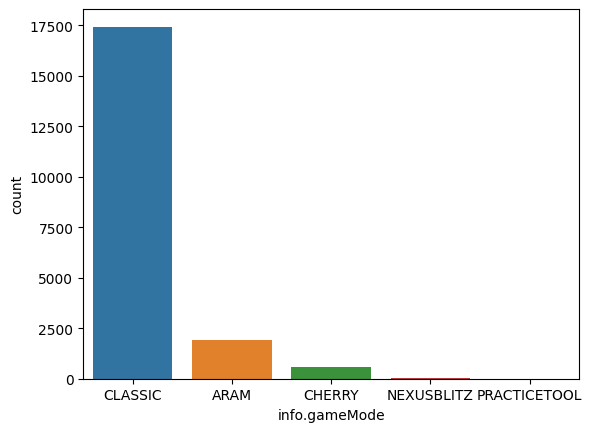

In [5]:
sns.countplot(df, x='info.gameMode', hue='info.gameMode')

In [6]:
version_ls = list(df['info.gameVersion'])

In [7]:
df['game_season'] = list(map(lambda x: int(x[:2]), version_ls))

In [8]:
df.head()

,metadata.dataVersion,metadata.matchId,metadata.participants,info.gameCreation,info.gameDuration,info.gameEndTimestamp,info.gameId,info.gameMode,info.gameName,info.gameStartTimestamp,info.gameType,info.gameVersion,info.mapId,info.participants,info.platformId,info.queueId,info.teams,info.tournamentCode,game_season
0,2,KR_6897835155,['rPB3njMNwR4YYoZ3fQbpj1bqHdKYhUzLhzRCcoi6brkg...,1705041391785,2023,1705043549770,6897835155,CLASSIC,teambuilder-match-6897835155,1705041526548,MATCHED_GAME,14.1.553.2414,11,"[{'allInPings': 1, 'assistMePings': 7, 'assist...",KR,420,"[{'bans': [{'championId': 39, 'pickTurn': 1}, ...",NaN,14
1,2,KR_6891315692,['5QYQum9pqoX45SOmiyi0e21DMNMlX-P7VQklFDwl6K9U...,1704655428529,911,1704656358591,6891315692,CLASSIC,teambuilder-match-6891315692,1704655446917,MATCHED_GAME,13.24.547.9214,11,"[{'allInPings': 0, 'assistMePings': 0, 'assist...",KR,420,"[{'bans': [{'championId': 104, 'pickTurn': 1},...",NaN,13
2,2,KR_6900635803,['qVW4g7yclDbkq47Fl1TrAT5wwGztgmNlr7k7qGIPsR6M...,1705158259862,1372,1705159651296,6900635803,CLASSIC,teambuilder-match-6900635803,1705158279113,MATCHED_GAME,14.1.553.2414,11,"[{'allInPings': 0, 'assistMePings': 1, 'assist...",KR,420,"[{'bans': [{'championId': 142, 'pickTurn': 1},...",NaN,14
3,2,KR_6888683033,['hw-sdFxitt1ld4YuYOfx0nB3vVWwz-FmcvADcMAnQRfl...,1704541321759,1847,1704543216228,6888683033,CLASSIC,teambuilder-match-6888683033,1704541368795,MATCHED_GAME,13.24.547.9214,11,"[{'allInPings': 0, 'assistMePings': 0, 'assist...",KR,490,"[{'bans': [], 'objectives': {'baron': {'first'...",NaN,13
4,2,KR_6903010835,['ZkcH9WhCs8_x6CRkOtNmGYREG_vdvZY9-P7TzSWi-gyr...,1705287714423,1730,1705289460813,6903010835,CLASSIC,teambuilder-match-6903010835,1705287730820,MATCHED_GAME,14.1.553.2414,11,"[{'allInPings': 0, 'assistMePings': 3, 'assist...",KR,420,"[{'bans': [{'championId': 126, 'pickTurn': 1},...",NaN,14


In [9]:
classic_game = df.loc[df['info.gameMode']=='CLASSIC']

In [10]:
classic_game['info.teams']

0        [{'bans': [{'championId': 39, 'pickTurn': 1}, ...
1        [{'bans': [{'championId': 104, 'pickTurn': 1},...
2        [{'bans': [{'championId': 142, 'pickTurn': 1},...
3        [{'bans': [], 'objectives': {'baron': {'first'...
4        [{'bans': [{'championId': 126, 'pickTurn': 1},...
                               ...                        
19974    [{'bans': [{'championId': 64, 'pickTurn': 1}, ...
19975    [{'bans': [{'championId': 22, 'pickTurn': 1}, ...
19976    [{'bans': [{'championId': 28, 'pickTurn': 1}, ...
19977    [{'bans': [{'championId': 28, 'pickTurn': 1}, ...
19979    [{'bans': [{'championId': 236, 'pickTurn': 1},...
Name: info.teams, Length: 17425, dtype: object

In [11]:
latest_season = classic_game.loc[classic_game['game_season'] == 14]

In [12]:
latest_season['info.participants']

0        [{'allInPings': 1, 'assistMePings': 7, 'assist...
2        [{'allInPings': 0, 'assistMePings': 1, 'assist...
4        [{'allInPings': 0, 'assistMePings': 3, 'assist...
7        [{'allInPings': 0, 'assistMePings': 1, 'assist...
8        [{'allInPings': 0, 'assistMePings': 0, 'assist...
                               ...                        
19972    [{'allInPings': 1, 'assistMePings': 4, 'assist...
19974    [{'allInPings': 0, 'assistMePings': 4, 'assist...
19976    [{'allInPings': 0, 'assistMePings': 0, 'assist...
19977    [{'allInPings': 0, 'assistMePings': 0, 'assist...
19979    [{'allInPings': 0, 'assistMePings': 0, 'assist...
Name: info.participants, Length: 12368, dtype: object

In [13]:
res = []
for i in tqdm(latest_season['info.participants']):
    res.append(ast.literal_eval(i))

  0%|          | 0/12368 [00:00<?, ?it/s]

100%|██████████| 12368/12368 [04:41<00:00, 43.90it/s]


In [ ]:
index = []
information = []
for idx, info in tqdm(enumerate(res)):
    for i in info:
        index.append(idx)
        try:
            del i['challenges']
        except:
            pass
        try:
            del i['missions']
        except:
            pass
        del i['perks']
        information.append(i)

12368it [00:00, 13293.88it/s]


In [ ]:
i.keys()

dict_keys(['allInPings', 'assistMePings', 'assists', 'baronKills', 'basicPings', 'bountyLevel', 'champExperience', 'champLevel', 'championId', 'championName', 'championTransform', 'commandPings', 'consumablesPurchased', 'damageDealtToBuildings', 'damageDealtToObjectives', 'damageDealtToTurrets', 'damageSelfMitigated', 'dangerPings', 'deaths', 'detectorWardsPlaced', 'doubleKills', 'dragonKills', 'eligibleForProgression', 'enemyMissingPings', 'enemyVisionPings', 'firstBloodAssist', 'firstBloodKill', 'firstTowerAssist', 'firstTowerKill', 'gameEndedInEarlySurrender', 'gameEndedInSurrender', 'getBackPings', 'goldEarned', 'goldSpent', 'holdPings', 'individualPosition', 'inhibitorKills', 'inhibitorTakedowns', 'inhibitorsLost', 'item0', 'item1', 'item2', 'item3', 'item4', 'item5', 'item6', 'itemsPurchased', 'killingSprees', 'kills', 'lane', 'largestCriticalStrike', 'largestKillingSpree', 'largestMultiKill', 'longestTimeSpentLiving', 'magicDamageDealt', 'magicDamageDealtToChampions', 'magicDama

In [ ]:
information[:10]

[{'allInPings': 1,
  'assistMePings': 7,
  'assists': 8,
  'baronKills': 0,
  'basicPings': 0,
  'bountyLevel': 0,
  'champExperience': 15507,
  'champLevel': 16,
  'championId': 74,
  'championName': 'Heimerdinger',
  'championTransform': 0,
  'commandPings': 3,
  'consumablesPurchased': 11,
  'damageDealtToBuildings': 2814,
  'damageDealtToObjectives': 8360,
  'damageDealtToTurrets': 2814,
  'damageSelfMitigated': 21029,
  'dangerPings': 0,
  'deaths': 10,
  'detectorWardsPlaced': 8,
  'doubleKills': 0,
  'dragonKills': 0,
  'eligibleForProgression': True,
  'enemyMissingPings': 4,
  'enemyVisionPings': 0,
  'firstBloodAssist': False,
  'firstBloodKill': False,
  'firstTowerAssist': False,
  'firstTowerKill': False,
  'gameEndedInEarlySurrender': False,
  'gameEndedInSurrender': False,
  'getBackPings': 0,
  'goldEarned': 12462,
  'goldSpent': 12075,
  'holdPings': 0,
  'individualPosition': 'TOP',
  'inhibitorKills': 0,
  'inhibitorTakedowns': 0,
  'inhibitorsLost': 2,
  'item0': 31

In [ ]:
participants = pd.json_normalize(information)

In [ ]:
participants['idx'] = index

In [ ]:
participants.head()

,allInPings,assistMePings,assists,baronKills,basicPings,bountyLevel,champExperience,champLevel,championId,championName,...,turretTakedowns,turretsLost,unrealKills,visionClearedPings,visionScore,visionWardsBoughtInGame,wardsKilled,wardsPlaced,win,idx
0,1,7,8,0,0,0,15507,16,74,Heimerdinger,...,1,8,0,0,41,9,4,20,False,0
1,5,1,5,0,0,0,16816,17,200,Belveth,...,1,8,0,0,29,6,6,7,False,0
2,0,1,4,0,0,0,17810,17,166,Akshan,...,1,8,0,0,22,4,3,14,False,0
3,0,0,4,0,0,0,13833,15,81,Ezreal,...,1,8,0,0,18,3,3,10,False,0
4,0,0,9,0,0,0,14128,15,17,Teemo,...,0,8,0,0,71,4,9,34,False,0


In [ ]:
participants.dtypes==np.int64

allInPings                  True
assistMePings               True
assists                     True
baronKills                  True
basicPings                  True
                           ...  
visionWardsBoughtInGame     True
wardsKilled                 True
wardsPlaced                 True
win                        False
idx                         True
Length: 140, dtype: bool

In [ ]:
data = participants.select_dtypes(np.int64)

In [ ]:
data = data.groupby(['idx', 'teamId'], as_index=False).sum()

/var/folders/h5/gswr1sjs3pg7jdl_fq608b5m0000gp/T/ipykernel_38499/1638413931.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data = data.groupby(['idx', 'teamId'], as_index=False).mean()
/var/folders/h5/gswr1sjs3pg7jdl_fq608b5m0000gp/T/ipykernel_38499/1638413931.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data = data.groupby(['idx', 'teamId'], as_index=False).mean()


In [ ]:
df = data.loc[data.idx == 0]
blue = df.loc[df.teamId==100].reset_index()
red = df.loc[df.teamId==200].reset_index()
b_columns = list(map(lambda x: 'blue_' + x, list(blue.columns)))
r_columns = list(map(lambda x: 'red_' + x, list(red.columns)))
blue.columns = b_columns
red.columns = r_columns
res = pd.concat([blue, red], axis=1)

In [ ]:
df

,idx,teamId,allInPings,assistMePings,assists,baronKills,basicPings,bountyLevel,champExperience,champLevel,...,trueDamageTaken,turretKills,turretTakedowns,turretsLost,unrealKills,visionClearedPings,visionScore,visionWardsBoughtInGame,wardsKilled,wardsPlaced
0,0,100,1.2,1.8,6.0,0.0,0.0,0.0,15618.8,16.0,...,1258.4,0.8,0.8,8.0,0.0,0.0,36.2,5.2,5.0,17.0
1,0,200,1.0,11.2,9.8,0.4,0.0,0.4,18434.4,17.4,...,1365.4,1.6,2.8,4.0,0.0,0.0,48.0,3.0,9.0,15.2


In [ ]:
blue

,blue_index,blue_idx,blue_teamId,blue_allInPings,blue_assistMePings,blue_assists,blue_baronKills,blue_basicPings,blue_bountyLevel,blue_champExperience,...,blue_trueDamageTaken,blue_turretKills,blue_turretTakedowns,blue_turretsLost,blue_unrealKills,blue_visionClearedPings,blue_visionScore,blue_visionWardsBoughtInGame,blue_wardsKilled,blue_wardsPlaced
0,0,0,100,1.2,1.8,6.0,0.0,0.0,0.0,15618.8,...,1258.4,0.8,0.8,8.0,0.0,0.0,36.2,5.2,5.0,17.0


In [ ]:
red

,red_index,red_idx,red_teamId,red_allInPings,red_assistMePings,red_assists,red_baronKills,red_basicPings,red_bountyLevel,red_champExperience,...,red_trueDamageTaken,red_turretKills,red_turretTakedowns,red_turretsLost,red_unrealKills,red_visionClearedPings,red_visionScore,red_visionWardsBoughtInGame,red_wardsKilled,red_wardsPlaced
0,1,0,200,1.0,11.2,9.8,0.4,0.0,0.4,18434.4,...,1365.4,1.6,2.8,4.0,0.0,0.0,48.0,3.0,9.0,15.2


In [ ]:
pd.concat([blue, red], axis=1, join='outer')

,blue_index,blue_idx,blue_teamId,blue_allInPings,blue_assistMePings,blue_assists,blue_baronKills,blue_basicPings,blue_bountyLevel,blue_champExperience,...,red_trueDamageTaken,red_turretKills,red_turretTakedowns,red_turretsLost,red_unrealKills,red_visionClearedPings,red_visionScore,red_visionWardsBoughtInGame,red_wardsKilled,red_wardsPlaced
0,0,0,100,1.2,1.8,6.0,0.0,0.0,0.0,15618.8,...,1365.4,1.6,2.8,4.0,0.0,0.0,48.0,3.0,9.0,15.2


In [ ]:
result = pd.DataFrame()
first = True
for idx in tqdm(data.idx.unique()):
    df = data.loc[data.idx == idx]
    blue = df.loc[df.teamId==100].reset_index()
    red = df.loc[df.teamId==200].reset_index()
    b_columns = list(map(lambda x: 'blue_' + x, list(blue.columns)))
    r_columns = list(map(lambda x: 'red_' + x, list(red.columns)))
    blue.columns = b_columns
    red.columns = r_columns
    res = pd.concat([blue, red], axis=1)
    if first:
        result = res
        first = False
    else:
        result = pd.concat([result, res], axis=0)

100%|██████████| 12368/12368 [00:22<00:00, 558.99it/s]


In [100]:
result

,blue_index,blue_idx,blue_teamId,blue_allInPings,blue_assistMePings,blue_assists,blue_baronKills,blue_basicPings,blue_bountyLevel,blue_champExperience,...,red_trueDamageTaken,red_turretKills,red_turretTakedowns,red_turretsLost,red_unrealKills,red_visionClearedPings,red_visionScore,red_visionWardsBoughtInGame,red_wardsKilled,red_wardsPlaced
0,0,0,100,1.2,1.8,6.0,0.0,0.0,0.0,15618.8,...,1365.4,1.6,2.8,4.0,0.0,0.0,48.0,3.0,9.0,15.2
0,2,1,100,0.0,1.6,11.6,0.0,0.0,1.8,10911.4,...,536.2,0.2,0.2,7.0,0.0,0.0,25.0,2.4,3.8,12.2
0,4,2,100,0.0,0.8,14.6,0.2,0.0,5.4,14457.6,...,1378.6,0.4,0.4,8.0,0.0,0.0,34.2,3.4,5.8,11.6
0,6,3,100,0.0,7.0,12.2,0.0,0.0,0.0,15345.6,...,1292.2,2.0,2.8,7.0,0.0,0.0,40.2,4.8,4.2,17.0
0,8,4,100,0.0,1.0,1.4,0.0,0.0,0.6,6050.2,...,283.6,0.8,0.8,0.0,0.0,0.0,16.4,1.2,2.6,6.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,24726,12363,100,0.2,0.8,6.2,0.0,0.0,0.0,11255.8,...,444.4,2.0,6.0,1.0,0.0,0.0,38.4,5.2,4.0,16.4
0,24728,12364,100,0.0,1.4,3.8,0.0,0.0,1.6,6324.4,...,156.8,0.0,0.0,6.0,0.0,0.0,12.4,0.6,2.0,5.2
0,24730,12365,100,0.0,3.4,17.2,0.4,0.0,1.6,15427.4,...,1489.2,0.8,1.4,7.0,0.0,0.0,40.8,4.6,4.6,20.2
0,24732,12366,100,0.0,3.4,17.2,0.4,0.0,1.6,15427.4,...,1489.2,0.8,1.4,7.0,0.0,0.0,40.8,4.6,4.6,20.2


In [105]:
result = result.drop(['blue_index', 'red_index'], axis=1).reset_index()

In [106]:
latest_game_info = latest_season['info.teams']

In [107]:
latest_game_info = list(map(lambda x: ast.literal_eval(x), latest_game_info))

In [108]:
latest_game_info[0]

[{'bans': [{'championId': 39, 'pickTurn': 1},
   {'championId': 142, 'pickTurn': 2},
   {'championId': 497, 'pickTurn': 3},
   {'championId': 21, 'pickTurn': 4},
   {'championId': 236, 'pickTurn': 5}],
  'objectives': {'baron': {'first': False, 'kills': 0},
   'champion': {'first': False, 'kills': 23},
   'dragon': {'first': False, 'kills': 2},
   'horde': {'first': True, 'kills': 6},
   'inhibitor': {'first': False, 'kills': 0},
   'riftHerald': {'first': True, 'kills': 1},
   'tower': {'first': True, 'kills': 4}},
  'teamId': 100,
  'win': False},
 {'bans': [{'championId': 236, 'pickTurn': 6},
   {'championId': 76, 'pickTurn': 7},
   {'championId': 235, 'pickTurn': 8},
   {'championId': 429, 'pickTurn': 9},
   {'championId': 64, 'pickTurn': 10}],
  'objectives': {'baron': {'first': True, 'kills': 2},
   'champion': {'first': True, 'kills': 38},
   'dragon': {'first': True, 'kills': 3},
   'horde': {'first': False, 'kills': 0},
   'inhibitor': {'first': True, 'kills': 2},
   'riftHera

In [109]:
blue = pd.json_normalize(latest_game_info)[0]
red = pd.json_normalize(latest_game_info)[1]

In [110]:
blue

0        {'bans': [{'championId': 39, 'pickTurn': 1}, {...
1        {'bans': [{'championId': 142, 'pickTurn': 1}, ...
2        {'bans': [{'championId': 126, 'pickTurn': 1}, ...
3        {'bans': [{'championId': 61, 'pickTurn': 1}, {...
4        {'bans': [{'championId': 555, 'pickTurn': 1}, ...
                               ...                        
12363    {'bans': [{'championId': 7, 'pickTurn': 1}, {'...
12364    {'bans': [{'championId': 64, 'pickTurn': 1}, {...
12365    {'bans': [{'championId': 28, 'pickTurn': 1}, {...
12366    {'bans': [{'championId': 28, 'pickTurn': 1}, {...
12367    {'bans': [{'championId': 236, 'pickTurn': 1}, ...
Name: 0, Length: 12368, dtype: object

In [111]:
blue = pd.json_normalize(blue)

In [112]:
b_columns = list(map(lambda x: 'blue_' + x, list(blue.columns)))

In [113]:
blue.columns = b_columns

In [114]:
blue

,blue_bans,blue_teamId,blue_win,blue_objectives.baron.first,blue_objectives.baron.kills,blue_objectives.champion.first,blue_objectives.champion.kills,blue_objectives.dragon.first,blue_objectives.dragon.kills,blue_objectives.horde.first,blue_objectives.horde.kills,blue_objectives.inhibitor.first,blue_objectives.inhibitor.kills,blue_objectives.riftHerald.first,blue_objectives.riftHerald.kills,blue_objectives.tower.first,blue_objectives.tower.kills
0,"[{'championId': 39, 'pickTurn': 1}, {'champion...",100,False,False,0,False,23,False,2,True,6,False,0,True,1,True,4
1,"[{'championId': 142, 'pickTurn': 1}, {'champio...",100,True,False,0,False,36,False,2,True,6,True,1,True,1,True,7
2,"[{'championId': 126, 'pickTurn': 1}, {'champio...",100,True,True,1,True,38,False,2,True,6,True,2,True,1,True,8
3,"[{'championId': 61, 'pickTurn': 1}, {'champion...",100,False,False,0,True,40,True,2,True,5,False,0,False,0,True,7
4,"[{'championId': 555, 'pickTurn': 1}, {'champio...",100,False,False,0,False,7,False,0,True,3,False,0,False,0,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12363,"[{'championId': 7, 'pickTurn': 1}, {'championI...",100,False,False,0,False,23,False,0,False,1,False,0,False,0,False,1
12364,"[{'championId': 64, 'pickTurn': 1}, {'champion...",100,True,False,0,True,18,True,2,True,6,False,0,True,1,True,6
12365,"[{'championId': 28, 'pickTurn': 1}, {'champion...",100,True,True,2,True,48,True,3,False,0,True,1,False,0,False,7
12366,"[{'championId': 28, 'pickTurn': 1}, {'champion...",100,True,True,2,True,48,True,3,False,0,True,1,False,0,False,7


In [115]:
red = pd.json_normalize(red)

In [116]:
red

,bans,teamId,win,objectives.baron.first,objectives.baron.kills,objectives.champion.first,objectives.champion.kills,objectives.dragon.first,objectives.dragon.kills,objectives.horde.first,objectives.horde.kills,objectives.inhibitor.first,objectives.inhibitor.kills,objectives.riftHerald.first,objectives.riftHerald.kills,objectives.tower.first,objectives.tower.kills
0,"[{'championId': 236, 'pickTurn': 6}, {'champio...",200,True,True,2,True,38,True,3,False,0,True,2,False,0,False,8
1,"[{'championId': -1, 'pickTurn': 6}, {'champion...",200,False,False,0,True,17,True,1,False,0,False,0,False,0,False,1
2,"[{'championId': 24, 'pickTurn': 6}, {'champion...",200,False,False,0,False,9,True,3,False,0,False,0,False,0,False,2
3,"[{'championId': 200, 'pickTurn': 6}, {'champio...",200,True,True,2,False,51,False,3,False,1,True,3,True,1,False,11
4,"[{'championId': 110, 'pickTurn': 6}, {'champio...",200,True,False,0,True,19,True,2,False,3,False,0,False,0,True,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12363,"[{'championId': 85, 'pickTurn': 6}, {'champion...",200,True,True,1,True,41,True,3,True,5,True,2,True,1,True,10
12364,"[{'championId': 119, 'pickTurn': 6}, {'champio...",200,False,False,0,False,6,False,0,False,0,False,0,False,0,False,0
12365,"[{'championId': 107, 'pickTurn': 6}, {'champio...",200,False,False,0,False,24,False,1,True,6,False,0,True,1,True,4
12366,"[{'championId': 107, 'pickTurn': 6}, {'champio...",200,False,False,0,False,24,False,1,True,6,False,0,True,1,True,4


In [117]:
r_columns = list(map(lambda x: 'red_' + x, list(red.columns)))

In [118]:
red.columns = r_columns

In [119]:
red

,red_bans,red_teamId,red_win,red_objectives.baron.first,red_objectives.baron.kills,red_objectives.champion.first,red_objectives.champion.kills,red_objectives.dragon.first,red_objectives.dragon.kills,red_objectives.horde.first,red_objectives.horde.kills,red_objectives.inhibitor.first,red_objectives.inhibitor.kills,red_objectives.riftHerald.first,red_objectives.riftHerald.kills,red_objectives.tower.first,red_objectives.tower.kills
0,"[{'championId': 236, 'pickTurn': 6}, {'champio...",200,True,True,2,True,38,True,3,False,0,True,2,False,0,False,8
1,"[{'championId': -1, 'pickTurn': 6}, {'champion...",200,False,False,0,True,17,True,1,False,0,False,0,False,0,False,1
2,"[{'championId': 24, 'pickTurn': 6}, {'champion...",200,False,False,0,False,9,True,3,False,0,False,0,False,0,False,2
3,"[{'championId': 200, 'pickTurn': 6}, {'champio...",200,True,True,2,False,51,False,3,False,1,True,3,True,1,False,11
4,"[{'championId': 110, 'pickTurn': 6}, {'champio...",200,True,False,0,True,19,True,2,False,3,False,0,False,0,True,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12363,"[{'championId': 85, 'pickTurn': 6}, {'champion...",200,True,True,1,True,41,True,3,True,5,True,2,True,1,True,10
12364,"[{'championId': 119, 'pickTurn': 6}, {'champio...",200,False,False,0,False,6,False,0,False,0,False,0,False,0,False,0
12365,"[{'championId': 107, 'pickTurn': 6}, {'champio...",200,False,False,0,False,24,False,1,True,6,False,0,True,1,True,4
12366,"[{'championId': 107, 'pickTurn': 6}, {'champio...",200,False,False,0,False,24,False,1,True,6,False,0,True,1,True,4


In [120]:
total = latest_season[['metadata.matchId', 'metadata.participants']]

In [121]:
total = total.reset_index().drop('index', axis=1)

In [122]:
total

,metadata.matchId,metadata.participants
0,KR_6897835155,['rPB3njMNwR4YYoZ3fQbpj1bqHdKYhUzLhzRCcoi6brkg...
1,KR_6900635803,['qVW4g7yclDbkq47Fl1TrAT5wwGztgmNlr7k7qGIPsR6M...
2,KR_6903010835,['ZkcH9WhCs8_x6CRkOtNmGYREG_vdvZY9-P7TzSWi-gyr...
3,KR_6897507607,['zA0NlkO84yDKabJvhbgU3AO7oNcS53eqrlSdFJT0LfSX...
4,KR_6894687696,['4bJvnoJIwN35tavTZem4tJJya03rYDRC-oygRYmbTE_I...
...,...,...
12363,KR_6897632585,['SivaoTHNmXyBWqIyA9Lw5j-nCcHkfuYAI6xJOKR4Dpmu...
12364,KR_6913727391,['ht46dad5XSdAXz61dNDGHKGGqjj0vcWG7K1Z-tiJSQXR...
12365,KR_6894562023,['T_pVBZfokiW5giCczG0SJr4ahF6tnlp0XbE1O0nZ8faJ...
12366,KR_6894562023,['T_pVBZfokiW5giCczG0SJr4ahF6tnlp0XbE1O0nZ8faJ...


In [123]:
total = pd.concat([total, blue, red], axis=1)

In [124]:
total

,metadata.matchId,metadata.participants,blue_bans,blue_teamId,blue_win,blue_objectives.baron.first,blue_objectives.baron.kills,blue_objectives.champion.first,blue_objectives.champion.kills,blue_objectives.dragon.first,...,red_objectives.dragon.first,red_objectives.dragon.kills,red_objectives.horde.first,red_objectives.horde.kills,red_objectives.inhibitor.first,red_objectives.inhibitor.kills,red_objectives.riftHerald.first,red_objectives.riftHerald.kills,red_objectives.tower.first,red_objectives.tower.kills
0,KR_6897835155,['rPB3njMNwR4YYoZ3fQbpj1bqHdKYhUzLhzRCcoi6brkg...,"[{'championId': 39, 'pickTurn': 1}, {'champion...",100,False,False,0,False,23,False,...,True,3,False,0,True,2,False,0,False,8
1,KR_6900635803,['qVW4g7yclDbkq47Fl1TrAT5wwGztgmNlr7k7qGIPsR6M...,"[{'championId': 142, 'pickTurn': 1}, {'champio...",100,True,False,0,False,36,False,...,True,1,False,0,False,0,False,0,False,1
2,KR_6903010835,['ZkcH9WhCs8_x6CRkOtNmGYREG_vdvZY9-P7TzSWi-gyr...,"[{'championId': 126, 'pickTurn': 1}, {'champio...",100,True,True,1,True,38,False,...,True,3,False,0,False,0,False,0,False,2
3,KR_6897507607,['zA0NlkO84yDKabJvhbgU3AO7oNcS53eqrlSdFJT0LfSX...,"[{'championId': 61, 'pickTurn': 1}, {'champion...",100,False,False,0,True,40,True,...,False,3,False,1,True,3,True,1,False,11
4,KR_6894687696,['4bJvnoJIwN35tavTZem4tJJya03rYDRC-oygRYmbTE_I...,"[{'championId': 555, 'pickTurn': 1}, {'champio...",100,False,False,0,False,7,False,...,True,2,False,3,False,0,False,0,True,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12363,KR_6897632585,['SivaoTHNmXyBWqIyA9Lw5j-nCcHkfuYAI6xJOKR4Dpmu...,"[{'championId': 7, 'pickTurn': 1}, {'championI...",100,False,False,0,False,23,False,...,True,3,True,5,True,2,True,1,True,10
12364,KR_6913727391,['ht46dad5XSdAXz61dNDGHKGGqjj0vcWG7K1Z-tiJSQXR...,"[{'championId': 64, 'pickTurn': 1}, {'champion...",100,True,False,0,True,18,True,...,False,0,False,0,False,0,False,0,False,0
12365,KR_6894562023,['T_pVBZfokiW5giCczG0SJr4ahF6tnlp0XbE1O0nZ8faJ...,"[{'championId': 28, 'pickTurn': 1}, {'champion...",100,True,True,2,True,48,True,...,False,1,True,6,False,0,True,1,True,4
12366,KR_6894562023,['T_pVBZfokiW5giCczG0SJr4ahF6tnlp0XbE1O0nZ8faJ...,"[{'championId': 28, 'pickTurn': 1}, {'champion...",100,True,True,2,True,48,True,...,False,1,True,6,False,0,True,1,True,4


In [125]:
# 블루팀의 승패가 곧 레드팀의 승패와 직결됨으로 레드팀 승패여부 삭제
total = total.drop('red_win', axis=1)

In [126]:
total

,metadata.matchId,metadata.participants,blue_bans,blue_teamId,blue_win,blue_objectives.baron.first,blue_objectives.baron.kills,blue_objectives.champion.first,blue_objectives.champion.kills,blue_objectives.dragon.first,...,red_objectives.dragon.first,red_objectives.dragon.kills,red_objectives.horde.first,red_objectives.horde.kills,red_objectives.inhibitor.first,red_objectives.inhibitor.kills,red_objectives.riftHerald.first,red_objectives.riftHerald.kills,red_objectives.tower.first,red_objectives.tower.kills
0,KR_6897835155,['rPB3njMNwR4YYoZ3fQbpj1bqHdKYhUzLhzRCcoi6brkg...,"[{'championId': 39, 'pickTurn': 1}, {'champion...",100,False,False,0,False,23,False,...,True,3,False,0,True,2,False,0,False,8
1,KR_6900635803,['qVW4g7yclDbkq47Fl1TrAT5wwGztgmNlr7k7qGIPsR6M...,"[{'championId': 142, 'pickTurn': 1}, {'champio...",100,True,False,0,False,36,False,...,True,1,False,0,False,0,False,0,False,1
2,KR_6903010835,['ZkcH9WhCs8_x6CRkOtNmGYREG_vdvZY9-P7TzSWi-gyr...,"[{'championId': 126, 'pickTurn': 1}, {'champio...",100,True,True,1,True,38,False,...,True,3,False,0,False,0,False,0,False,2
3,KR_6897507607,['zA0NlkO84yDKabJvhbgU3AO7oNcS53eqrlSdFJT0LfSX...,"[{'championId': 61, 'pickTurn': 1}, {'champion...",100,False,False,0,True,40,True,...,False,3,False,1,True,3,True,1,False,11
4,KR_6894687696,['4bJvnoJIwN35tavTZem4tJJya03rYDRC-oygRYmbTE_I...,"[{'championId': 555, 'pickTurn': 1}, {'champio...",100,False,False,0,False,7,False,...,True,2,False,3,False,0,False,0,True,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12363,KR_6897632585,['SivaoTHNmXyBWqIyA9Lw5j-nCcHkfuYAI6xJOKR4Dpmu...,"[{'championId': 7, 'pickTurn': 1}, {'championI...",100,False,False,0,False,23,False,...,True,3,True,5,True,2,True,1,True,10
12364,KR_6913727391,['ht46dad5XSdAXz61dNDGHKGGqjj0vcWG7K1Z-tiJSQXR...,"[{'championId': 64, 'pickTurn': 1}, {'champion...",100,True,False,0,True,18,True,...,False,0,False,0,False,0,False,0,False,0
12365,KR_6894562023,['T_pVBZfokiW5giCczG0SJr4ahF6tnlp0XbE1O0nZ8faJ...,"[{'championId': 28, 'pickTurn': 1}, {'champion...",100,True,True,2,True,48,True,...,False,1,True,6,False,0,True,1,True,4
12366,KR_6894562023,['T_pVBZfokiW5giCczG0SJr4ahF6tnlp0XbE1O0nZ8faJ...,"[{'championId': 28, 'pickTurn': 1}, {'champion...",100,True,True,2,True,48,True,...,False,1,True,6,False,0,True,1,True,4


In [128]:
total = pd.concat([total, result], axis=1)

In [12]:
total = total.drop(['metadata.participants', 'blue_bans', 'red_bans', 'blue_teamId', 'red_teamId'], axis=1)

KeyError: "['metadata.participants', 'blue_bans', 'red_bans', 'blue_teamId', 'red_teamId'] not found in axis"

In [132]:
total

,metadata.matchId,blue_teamId,blue_win,blue_objectives.baron.first,blue_objectives.baron.kills,blue_objectives.champion.first,blue_objectives.champion.kills,blue_objectives.dragon.first,blue_objectives.dragon.kills,blue_objectives.horde.first,...,red_trueDamageTaken,red_turretKills,red_turretTakedowns,red_turretsLost,red_unrealKills,red_visionClearedPings,red_visionScore,red_visionWardsBoughtInGame,red_wardsKilled,red_wardsPlaced
0,KR_6897835155,100,False,False,0,False,23,False,2,True,...,1365.4,1.6,2.8,4.0,0.0,0.0,48.0,3.0,9.0,15.2
1,KR_6900635803,100,True,False,0,False,36,False,2,True,...,536.2,0.2,0.2,7.0,0.0,0.0,25.0,2.4,3.8,12.2
2,KR_6903010835,100,True,True,1,True,38,False,2,True,...,1378.6,0.4,0.4,8.0,0.0,0.0,34.2,3.4,5.8,11.6
3,KR_6897507607,100,False,False,0,True,40,True,2,True,...,1292.2,2.0,2.8,7.0,0.0,0.0,40.2,4.8,4.2,17.0
4,KR_6894687696,100,False,False,0,False,7,False,0,True,...,283.6,0.8,0.8,0.0,0.0,0.0,16.4,1.2,2.6,6.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12363,KR_6897632585,100,False,False,0,False,23,False,0,False,...,444.4,2.0,6.0,1.0,0.0,0.0,38.4,5.2,4.0,16.4
12364,KR_6913727391,100,True,False,0,True,18,True,2,True,...,156.8,0.0,0.0,6.0,0.0,0.0,12.4,0.6,2.0,5.2
12365,KR_6894562023,100,True,True,2,True,48,True,3,False,...,1489.2,0.8,1.4,7.0,0.0,0.0,40.8,4.6,4.6,20.2
12366,KR_6894562023,100,True,True,2,True,48,True,3,False,...,1489.2,0.8,1.4,7.0,0.0,0.0,40.8,4.6,4.6,20.2


In [11]:
total.to_csv('preprocessed_data.csv')

### 공허유충 처치 데이터
- 블루팀에서 레드팀 데이터를 뺴서 두개의 컬럼을 하나로 병합

In [127]:
total['horde_kills'] = total['blue_objectives.horde.kills'] - total['red_objectives.horde.kills']

In [160]:
# total = total.drop(['blue_objectives.horde.kills', 'red_objectives.horde.kills'], axis=1)

In [161]:
total = total.drop(['blue_bans', 'red_bans'], axis=1)

In [162]:
total

,metadata.matchId,metadata.participants,blue_teamId,blue_win,blue_objectives.baron.first,blue_objectives.baron.kills,blue_objectives.champion.first,blue_objectives.champion.kills,blue_objectives.dragon.first,blue_objectives.dragon.kills,...,red_objectives.dragon.kills,red_objectives.horde.first,red_objectives.horde.kills,red_objectives.inhibitor.first,red_objectives.inhibitor.kills,red_objectives.riftHerald.first,red_objectives.riftHerald.kills,red_objectives.tower.first,red_objectives.tower.kills,horde_kills
0,KR_6897835155,['rPB3njMNwR4YYoZ3fQbpj1bqHdKYhUzLhzRCcoi6brkg...,100,False,False,0,False,23,False,2,...,3,False,0,True,2,False,0,False,8,6
1,KR_6900635803,['qVW4g7yclDbkq47Fl1TrAT5wwGztgmNlr7k7qGIPsR6M...,100,True,False,0,False,36,False,2,...,1,False,0,False,0,False,0,False,1,6
2,KR_6903010835,['ZkcH9WhCs8_x6CRkOtNmGYREG_vdvZY9-P7TzSWi-gyr...,100,True,True,1,True,38,False,2,...,3,False,0,False,0,False,0,False,2,6
3,KR_6897507607,['zA0NlkO84yDKabJvhbgU3AO7oNcS53eqrlSdFJT0LfSX...,100,False,False,0,True,40,True,2,...,3,False,1,True,3,True,1,False,11,4
4,KR_6894687696,['4bJvnoJIwN35tavTZem4tJJya03rYDRC-oygRYmbTE_I...,100,False,False,0,False,7,False,0,...,2,False,3,False,0,False,0,True,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12363,KR_6897632585,['SivaoTHNmXyBWqIyA9Lw5j-nCcHkfuYAI6xJOKR4Dpmu...,100,False,False,0,False,23,False,0,...,3,True,5,True,2,True,1,True,10,-4
12364,KR_6913727391,['ht46dad5XSdAXz61dNDGHKGGqjj0vcWG7K1Z-tiJSQXR...,100,True,False,0,True,18,True,2,...,0,False,0,False,0,False,0,False,0,6
12365,KR_6894562023,['T_pVBZfokiW5giCczG0SJr4ahF6tnlp0XbE1O0nZ8faJ...,100,True,True,2,True,48,True,3,...,1,True,6,False,0,True,1,True,4,-6
12366,KR_6894562023,['T_pVBZfokiW5giCczG0SJr4ahF6tnlp0XbE1O0nZ8faJ...,100,True,True,2,True,48,True,3,...,1,True,6,False,0,True,1,True,4,-6


In [163]:
user_data = pd.read_csv('/Users/raphaelseo/Documents/projects/data_analysis/lol24/lol_user_with_puuid.csv', index_col=0)

In [164]:
user_data.head()

,leagueId,queueType,tier,rank,summonerId,summonerName,leaguePoints,wins,losses,veteran,inactive,freshBlood,hotStreak,puuid
0,03746e6d-117c-33f2-a366-332950715348,RANKED_SOLO_5x5,CHALLENGER,I,KpLF5bdEle_K8WGnRRtm_WB3X_MPGwylt5afwDqXDb3osvI,타 잔,973,78,50,False,False,False,False,kYxsIzLbLObuvFzb57tpONXomN-AaThttC-IpORZVCOwAM...
1,03746e6d-117c-33f2-a366-332950715348,RANKED_SOLO_5x5,CHALLENGER,I,6tPsRZWvqGSgNcuVbZ0ljI_sMmZve1YXC6KCO0prnBRPxlY,디케이 탑,887,92,63,False,False,True,True,XB6vMX4pg1RKojW9lvZOv7shV5l77SbjH0FG5Rcyp0Y5Vd...
2,03746e6d-117c-33f2-a366-332950715348,RANKED_SOLO_5x5,CHALLENGER,I,VjiAQxZUCxlNuIIO2F07N5jNHq1pEbd6o38N3xnMZ9cEoH...,aowamzosq,884,119,90,False,False,True,False,BGWlOSYNT-3VLSH_iN0xquS_igBPReIqSlqqhy6o_Fupse...
3,03746e6d-117c-33f2-a366-332950715348,RANKED_SOLO_5x5,CHALLENGER,I,giRYflbmtnoWTnExmfatDcXHcL0cUSp6VeIyyYDAOpMfOWA,노란 쏨뱅이,673,49,20,False,False,True,False,bpFSZ73GHk8GtDu8Lyg1Nd9ZOM9euNKNFxRcxxNqqDUcbK...
4,03746e6d-117c-33f2-a366-332950715348,RANKED_SOLO_5x5,CHALLENGER,I,8eqUwdb0KugpG6IplBF2udUbyBLTVrQ05e5DzBe9pIkjIu...,srysrysrysrymyb,647,119,99,False,False,True,False,ukL6ULSEGMY3XAUR4MFBPI81fnrm4MsviNjqKuDANIT7dQ...


In [165]:
test = ast.literal_eval(total['metadata.participants'][0])[3]

In [166]:
puuid_list = list(user_data['puuid'])

In [167]:
if test in puuid_list:
    print(True)

In [168]:
user_data.loc[user_data['puuid'] == ast.literal_eval(total['metadata.participants'][0])[4]]

,leagueId,queueType,tier,rank,summonerId,summonerName,leaguePoints,wins,losses,veteran,inactive,freshBlood,hotStreak,puuid
1980,32006a85-9d02-3e88-b745-2b9fb712f0a7,RANKED_SOLO_5x5,MASTER,I,Up0mwGWubZc6yjRP0EEUR6MihuPvlVQjV7imRYeT9ZWAuw,오소리 개모,0,50,38,False,False,True,False,ZQHaQDMCNh3_FB7d4vawjjYymMsDwV2eruVDL_gCOeJU6F...


In [169]:
test

'phzMfWk6i9w51egPnMu4608znlGRxw2PWneDuMJfMZtcFmCY53peNWzpHhsRmKq_LJ-uqKB16jYx_Q'

In [170]:
test_total = total.drop(['metadata.participants', 'metadata.matchId', 'blue_teamId', 'red_teamId'], axis=1)

In [171]:
test_total

,blue_win,blue_objectives.baron.first,blue_objectives.baron.kills,blue_objectives.champion.first,blue_objectives.champion.kills,blue_objectives.dragon.first,blue_objectives.dragon.kills,blue_objectives.horde.first,blue_objectives.horde.kills,blue_objectives.inhibitor.first,...,red_objectives.dragon.kills,red_objectives.horde.first,red_objectives.horde.kills,red_objectives.inhibitor.first,red_objectives.inhibitor.kills,red_objectives.riftHerald.first,red_objectives.riftHerald.kills,red_objectives.tower.first,red_objectives.tower.kills,horde_kills
0,False,False,0,False,23,False,2,True,6,False,...,3,False,0,True,2,False,0,False,8,6
1,True,False,0,False,36,False,2,True,6,True,...,1,False,0,False,0,False,0,False,1,6
2,True,True,1,True,38,False,2,True,6,True,...,3,False,0,False,0,False,0,False,2,6
3,False,False,0,True,40,True,2,True,5,False,...,3,False,1,True,3,True,1,False,11,4
4,False,False,0,False,7,False,0,True,3,False,...,2,False,3,False,0,False,0,True,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12363,False,False,0,False,23,False,0,False,1,False,...,3,True,5,True,2,True,1,True,10,-4
12364,True,False,0,True,18,True,2,True,6,False,...,0,False,0,False,0,False,0,False,0,6
12365,True,True,2,True,48,True,3,False,0,True,...,1,True,6,False,0,True,1,True,4,-6
12366,True,True,2,True,48,True,3,False,0,True,...,1,True,6,False,0,True,1,True,4,-6


In [172]:
test_total.corr()['blue_win']

blue_win                            1.000000
blue_objectives.baron.first         0.488189
blue_objectives.baron.kills         0.470898
blue_objectives.champion.first      0.208777
blue_objectives.champion.kills      0.512512
blue_objectives.dragon.first        0.241401
blue_objectives.dragon.kills        0.503265
blue_objectives.horde.first         0.098304
blue_objectives.horde.kills         0.261758
blue_objectives.inhibitor.first     0.645337
blue_objectives.inhibitor.kills     0.579869
blue_objectives.riftHerald.first    0.327922
blue_objectives.riftHerald.kills    0.327922
blue_objectives.tower.first         0.427100
blue_objectives.tower.kills         0.694026
red_objectives.baron.first         -0.462744
red_objectives.baron.kills         -0.434586
red_objectives.champion.first      -0.208437
red_objectives.champion.kills      -0.476752
red_objectives.dragon.first        -0.241593
red_objectives.dragon.kills        -0.476548
red_objectives.horde.first         -0.100803
red_object